# Fresh Notebook to Examine Plots, CSVs from scripts

In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
from eval_script import *

/home/llm-hackathon/enter/envs/datalite_env/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
v1_path = './02-26-24/data'
v2_path = './02-11-24/data'

# BART classification output on llava reports
lcr = 'llava_classified_reports.csv' 
# BART classification output on radiologist reports
rcr = 'radiologist_classified_reports.csv'
# augmented test inference csv from eval_script.py 
ti = 'test_inference.csv'
# training data used to fine tune llava models 
td = 'train_data.csv'

# # the 01-29-24 verson of llava tuned 
# # llava classified reports v1
# v1_lrep = pd.read_csv(os.path.join(v1_path, lcr))
# # radiologist classified reports v1
# v1_rrep = pd.read_csv(os.path.join(v1_path, rcr))

# llava reports classified v2
v2_lrep = pd.read_csv(os.path.join(v2_path, lcr))
# radiologist reports classified v2
v2_rrep = pd.read_csv(os.path.join(v2_path, rcr))

# eval set for model 1
v1_test_inference = pd.read_csv(os.path.join(v1_path, ti)).round(2)
# eval set for model 2
v2_test_inference = pd.read_csv(os.path.join(v2_path, ti))

# training data for model 1
v1_td = pd.read_csv(os.path.join(v1_path, td))
# training data for model 2
v2_td = pd.read_csv(os.path.join(v2_path, td))

In [4]:
def compare_columns(df1, df2, col1, col2, title, xlabel):

    plt.hist(df1[col1], bins=10, alpha=0.5, label=f'{col1} llava', color='blue', edgecolor='black', density=True)
    plt.hist(df2[col2], bins=10, alpha=0.5, label=f'{col2} radiologist', color='red', edgecolor='black', density=True)

    # Add legend
    plt.legend(loc='upper right')

    # Add labels and title
    plt.xlabel('Classification Score')
    plt.ylabel('Frequency')
    plt.title(title.format(col1))

    # Show plot
    plt.show()

In [5]:
conditions = ['pneumonia',
 'pneumothorax',
 'cardiolmegaly',
 'pleural effusion',
 'edema',
 'rib fracture']

In [6]:
# title = 'BART Zero Shot Scores of llava vs radiologist for {}'
# xlabel = 'Classification Score'
# for condition in conditions:
#     compare_columns(v1_lrep, v1_rrep, condition, condition, title, xlabel)

In [7]:
v2_lrep

,Unnamed: 0,report,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture,id
0,0,FINDINGS: See impression. Signed b...,0.80,0.06,0.04,0.04,0.03,0.02,50018904
1,1,FINDINGS: See impression. Signed b...,0.78,0.07,0.03,0.04,0.04,0.03,50019069
2,2,FINDINGS: See impression.\n\n\n\n\n*\n\nSigned...,0.19,0.17,0.14,0.22,0.13,0.16,50020873
3,3,FINDINGS: See IMPRESSION.\n\n\n\n\n*\n\nSigned...,0.11,0.43,0.16,0.08,0.17,0.04,50106449
4,4,FINDINGS: See impression Signed by...,0.09,0.20,0.24,0.09,0.32,0.07,50149298
...,...,...,...,...,...,...,...,...,...
942,942,FINDINGS: See impression. Signed b...,0.11,0.21,0.13,0.17,0.24,0.13,53256464
943,943,FINDINGS: See impression. Signed b...,0.23,0.07,0.57,0.03,0.08,0.02,53256787
944,944,FINDINGS: Unremarkable cardiomediastinal silho...,0.28,0.30,0.27,0.07,0.05,0.04,53256942
945,945,FINDINGS: Unremarkable cardiomediastinal silho...,0.19,0.26,0.31,0.14,0.07,0.04,53256942


In [8]:
v2_rrep

,Unnamed: 0,report,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture,id
0,0,FINDINGS:\nRight upper extremity PICC line is ...,0.46,0.37,0.08,0.05,0.03,0.01,50018904
1,1,FINDINGS:\nImplanted MediPort over the right c...,0.21,0.26,0.27,0.14,0.05,0.06,50019069
2,2,FINDINGS:\nDual lead ICD over left chest.Unrem...,0.12,0.28,0.36,0.18,0.04,0.03,50020873
3,3,FINDINGS:\nSee IMPRESSION.\n\nIMPRESSION: Enla...,0.83,0.06,0.02,0.07,0.01,0.01,50106449
4,4,FINDINGS:\nLungs are well expanded. Bilateral ...,0.59,0.10,0.15,0.13,0.02,0.02,50149298
...,...,...,...,...,...,...,...,...,...
942,942,FINDINGS:\nSee impression.\n\n\nIMPRESSION: St...,0.13,0.21,0.19,0.20,0.11,0.16,53256464
943,943,FINDINGS:\nSee impression.\n\n\nIMPRESSION: In...,0.11,0.63,0.13,0.05,0.06,0.03,53256787
944,944,FINDINGS:\nVP shunt tubing is noted.Unremarkab...,0.13,0.33,0.29,0.18,0.05,0.03,53256942
945,945,FINDINGS:\nVP shunt tubing is noted.Unremarkab...,0.13,0.33,0.29,0.18,0.05,0.03,53256942


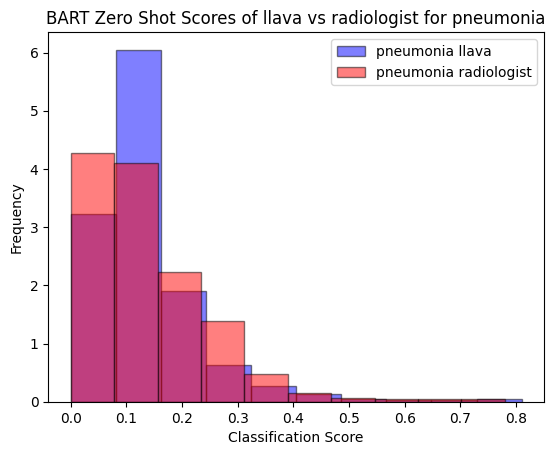

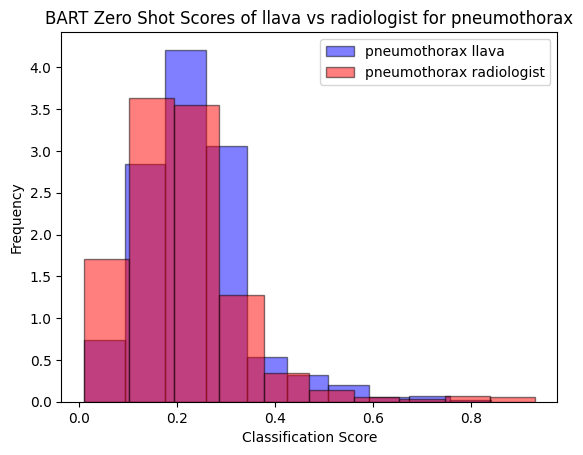

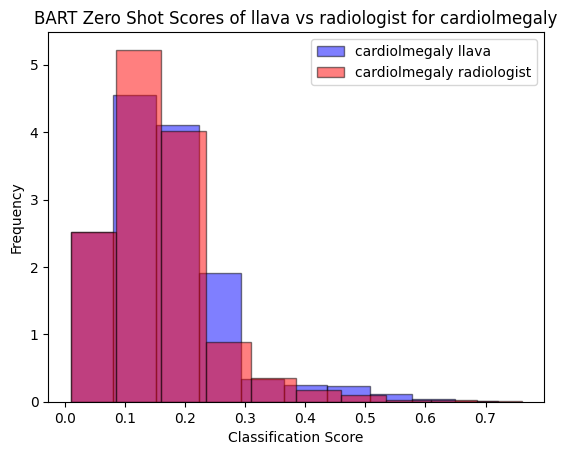

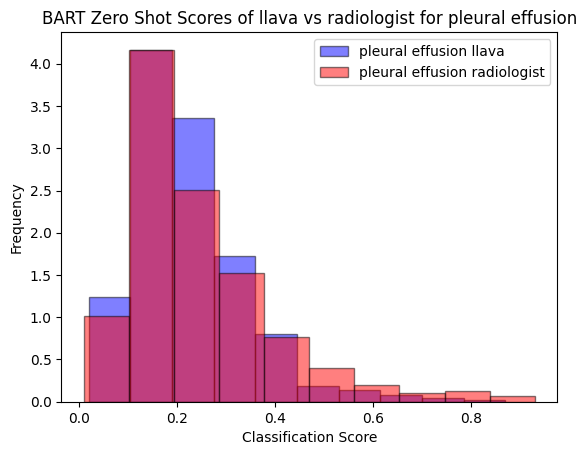

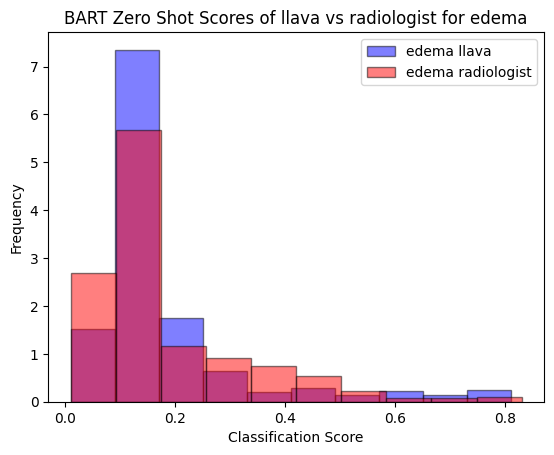

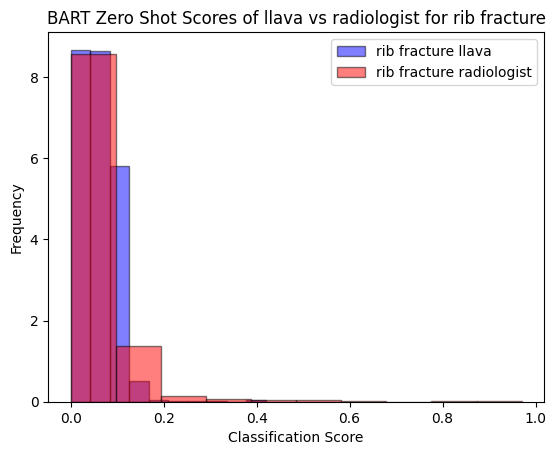

In [9]:
title = 'BART Zero Shot Scores of llava vs radiologist for {}'
xlabel = 'Classification Score'
for condition in conditions:
    compare_columns(v2_lrep, v2_rrep, condition, condition, title, xlabel)

In [10]:
full_classified_path = os.path.join(v2_path, 'radiologist_classified_reports_training_set.csv')

train_classified_df = pd.read_csv(full_classified_path)


In [11]:
train_classified_df

,report,pleural effusion,edema,pneumothorax,pneumonia,cardiolmegaly,rib fracture,id
0,FINDINGS: See impression.IMPRESSION: Low lung ...,0.29,0.24,0.18,0.12,0.11,0.06,44066501
1,FINDINGS: *\n\nLines and Tubes: Chest port is ...,0.34,0.05,0.12,0.36,0.10,0.02,44066404
2,FINDINGS: *\n\nLines and Tubes: None\n\n\nMedi...,0.18,0.11,0.16,0.05,0.15,0.37,44065448
3,FINDINGS: Single portable supine radiograph of...,0.42,0.11,0.20,0.04,0.14,0.08,44067132
4,FINDINGS: *\n\nLines and Tubes: Chest port is ...,0.32,0.38,0.11,0.09,0.08,0.03,44067157
...,...,...,...,...,...,...,...,...
97373,"FINDINGS: Devices, lines and Tubes: None Me...",0.15,0.09,0.22,0.20,0.24,0.09,54167443
97374,FINDINGS: Lines and Tubes: None Mediastinum: ...,0.16,0.13,0.32,0.14,0.14,0.12,53726745
97375,FINDINGS: Lines and Tubes: None Mediastinum: ...,0.16,0.12,0.34,0.10,0.14,0.14,53727052
97376,FINDINGS: Lines and Tubes: None Mediastinum: ...,0.21,0.17,0.39,0.08,0.10,0.06,53530452


In [12]:
train_classified_df = train_classified_df.round(1)

In [13]:
# TODO: bin the classes (low confidence, moderate confidence, high confidence)

In [14]:
scores = train_classified_df.drop(axis=1, columns=['report']).set_index('id')

In [15]:
# examine some of the data
r = train_classified_df[train_classified_df['pleural effusion'] == 0.2].sample()
print(r['report'].iloc[0])
r

FINDINGS: See impression             Signed by: Hahn, Lewis 04/30/2021 10:07:23IMPRESSION: Endotracheal tube terminates approximately 3.7 cm above carina. No additional change.


,report,pleural effusion,edema,pneumothorax,pneumonia,cardiolmegaly,rib fracture,id
86225,FINDINGS: See impression Signed by...,0.2,0.1,0.3,0.1,0.2,0.1,53610240


In [16]:
train_reports = train_classified_df['report']

In [17]:
scores.quantile(axis=0) # 50th percentile

pleural effusion    0.2
edema               0.1
pneumothorax        0.2
pneumonia           0.1
cardiolmegaly       0.1
rib fracture        0.0
Name: 0.5, dtype: float64

In [18]:
scores.quantile(q=.33, axis=0)

pleural effusion    0.2
edema               0.1
pneumothorax        0.2
pneumonia           0.1
cardiolmegaly       0.1
rib fracture        0.0
Name: 0.33, dtype: float64

In [19]:
scores.quantile(q=.66)

pleural effusion    0.3
edema               0.2
pneumothorax        0.2
pneumonia           0.1
cardiolmegaly       0.2
rib fracture        0.1
Name: 0.66, dtype: float64

In [20]:
scores.quantile(q=.25)

pleural effusion    0.2
edema               0.1
pneumothorax        0.1
pneumonia           0.1
cardiolmegaly       0.1
rib fracture        0.0
Name: 0.25, dtype: float64

In [21]:
scores.quantile(q=0.95)

pleural effusion    0.6
edema               0.4
pneumothorax        0.4
pneumonia           0.3
cardiolmegaly       0.3
rib fracture        0.2
Name: 0.95, dtype: float64

In [22]:
def mapper(x):
    if isinstance(x, str):
        return x
    if x <= 0.33:
        return 'low'
    elif (x > .33) and (x <= .66):
        return 'moderate'
    else: 
        return 'high'

In [23]:
binned_df = train_classified_df.set_index('id').map(mapper)
binned_df

,report,pleural effusion,edema,pneumothorax,pneumonia,cardiolmegaly,rib fracture
id,,,,,,,
44066501,FINDINGS: See impression.IMPRESSION: Low lung ...,low,low,low,low,low,low
44066404,FINDINGS: *\n\nLines and Tubes: Chest port is ...,low,low,low,moderate,low,low
44065448,FINDINGS: *\n\nLines and Tubes: None\n\n\nMedi...,low,low,low,low,low,moderate
44067132,FINDINGS: Single portable supine radiograph of...,moderate,low,low,low,low,low
44067157,FINDINGS: *\n\nLines and Tubes: Chest port is ...,low,moderate,low,low,low,low
...,...,...,...,...,...,...,...
54167443,"FINDINGS: Devices, lines and Tubes: None Me...",low,low,low,low,low,low
53726745,FINDINGS: Lines and Tubes: None Mediastinum: ...,low,low,low,low,low,low
53727052,FINDINGS: Lines and Tubes: None Mediastinum: ...,low,low,low,low,low,low


In [24]:
r = binned_df[binned_df['pleural effusion'] == 'low'].sample()
print(r['report'].iloc[0])
r

FINDINGS: See impression.             Signed by: Horowitz, Michael 05/22/2021 12:43:09IMPRESSION: Slightly more conspicuous right lateral basal lucency and linear opacity, could represent a skin fold versus trace pneumothorax component. Attention on follow-up radiographs.    No other interval change.


,report,pleural effusion,edema,pneumothorax,pneumonia,cardiolmegaly,rib fracture
id,,,,,,,
53678871,FINDINGS: See impression. Signed b...,low,low,moderate,low,low,low


In [25]:
d = dict()
for col in binned_df.columns:
    d[col] = list(binned_df[col].value_counts(normalize=True))

d['idx'] = ['low', 'moderate', 'high']

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data as a dictionary
data = {
    'Condition': ['Pleural Effusion', 'Edema', 'Pneumothorax', 'Pneumonia', 'Cardiomegaly', 'Rib Fracture'],
    'Low': [0.749553, 0.876563, 0.895028, 0.952381, 0.970979, 0.982316],
    'Moderate': [0.224342, 0.117152, 0.097958, 0.045770, 0.027450, 0.016554],
    'High': [0.026104, 0.006285, 0.007014, 0.001848, 0.001571, 0.001130]
}

# Converting dictionary to DataFrame
df = pd.DataFrame(data)

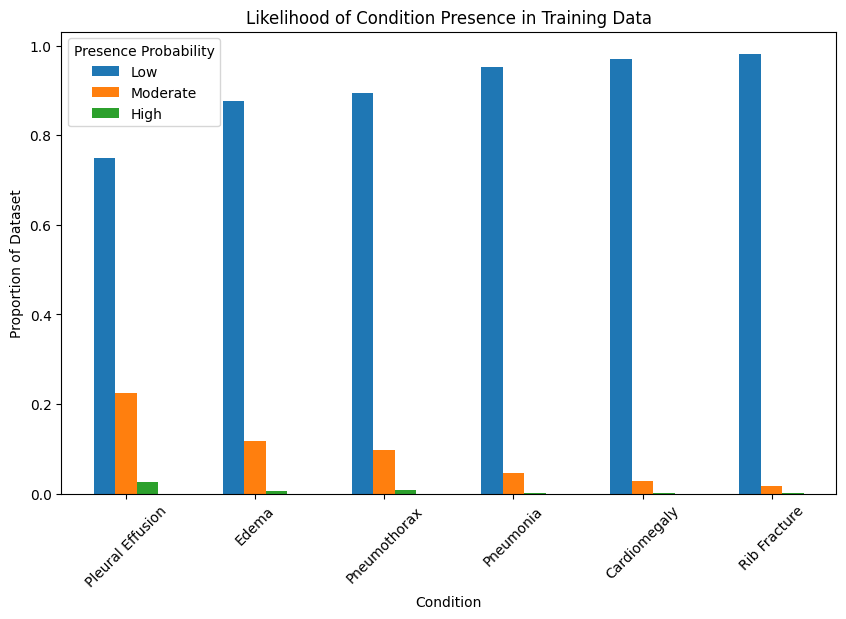

In [27]:
df.plot(x='Condition', kind='bar', stacked=False, figsize=(10, 6))
plt.title('Likelihood of Condition Presence in Training Data')
plt.ylabel('Proportion of Dataset')
plt.xlabel('Condition')
plt.legend(title='Presence Probability')
plt.xticks(rotation=45)
plt.show()

In [28]:
v2_lrep.drop('Unnamed: 0', axis=1, inplace=True)
v2_lrep.set_index('id', inplace=True)
v2_rrep.drop('Unnamed: 0', axis=1, inplace=True)
v2_rrep.set_index('id', inplace=True)
v2_lrep_classes = v2_lrep.map(mapper)
v2_rrep_classes = v2_rrep.map(mapper)

In [29]:
v2_lrep_classes

,report,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture
id,,,,,,,
50018904,FINDINGS: See impression. Signed b...,high,low,low,low,low,low
50019069,FINDINGS: See impression. Signed b...,high,low,low,low,low,low
50020873,FINDINGS: See impression.\n\n\n\n\n*\n\nSigned...,low,low,low,low,low,low
50106449,FINDINGS: See IMPRESSION.\n\n\n\n\n*\n\nSigned...,low,moderate,low,low,low,low
50149298,FINDINGS: See impression Signed by...,low,low,low,low,low,low
...,...,...,...,...,...,...,...
53256464,FINDINGS: See impression. Signed b...,low,low,low,low,low,low
53256787,FINDINGS: See impression. Signed b...,low,low,moderate,low,low,low
53256942,FINDINGS: Unremarkable cardiomediastinal silho...,low,low,low,low,low,low


In [30]:
v2_rrep_classes

,report,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture
id,,,,,,,
50018904,FINDINGS:\nRight upper extremity PICC line is ...,moderate,moderate,low,low,low,low
50019069,FINDINGS:\nImplanted MediPort over the right c...,low,low,low,low,low,low
50020873,FINDINGS:\nDual lead ICD over left chest.Unrem...,low,low,moderate,low,low,low
50106449,FINDINGS:\nSee IMPRESSION.\n\nIMPRESSION: Enla...,high,low,low,low,low,low
50149298,FINDINGS:\nLungs are well expanded. Bilateral ...,moderate,low,low,low,low,low
...,...,...,...,...,...,...,...
53256464,FINDINGS:\nSee impression.\n\n\nIMPRESSION: St...,low,low,low,low,low,low
53256787,FINDINGS:\nSee impression.\n\n\nIMPRESSION: In...,low,moderate,low,low,low,low
53256942,FINDINGS:\nVP shunt tubing is noted.Unremarkab...,low,low,low,low,low,low


In [31]:
# RUN THIS FUNCTION TO EXAMINE HOW WELL LLAVA DOES BY BART'S JUDGMENT 
def sample_dfs(df1, df2, cls='moderate', col='pleural effusion'):
    df1_filtered = df1[df1[col] == cls]
    df2_filtered = df2.loc[df1_filtered.index]
    
    n_rows = df1_filtered.shape[0]
    i = np.random.randint(0, n_rows)
    
    r1 = df1_filtered.iloc[i]
    r2 = df2_filtered.iloc[i]
    
    print('LLAVA REPORT')
    print(r1['report'])
    print('=' * 20)
    print('RADIOLOGIST REPORT')
    print(r2['report'])
    
    r1 = r1.drop('report')
    r2 = r2.drop('report')
    
    out = pd.DataFrame([r1, r2])
    
    out['report_type'] = ['llava_report', 'radiologist_report']
    
    out.set_index('report_type', inplace=True)
    
    return out

In [32]:
sample_dfs(v2_lrep_classes, v2_rrep_classes)

LLAVA REPORT
FINDINGS: Devices, lines and Tubes: None    Mediastinum: Unchanged cardiac silhouette and mediastinal contours. No lymphadenopathy is appreciated.    Lungs: Improved left basal aeration.    Pleura: Decreased or resolved left effusion. No pneumothorax.    Bones and soft tissues: Unchanged             Signed by: Horowitz, Michael 06/01/2021 15:17:18IMPRESSION: Decreased or resolved left pleural effusion. No pneumothorax.
RADIOLOGIST REPORT
FINDINGS:
See impression.


IMPRESSION: Slight interval decrease in size of the small left pleural effusion status post thoracentesis. No pneumothorax or other acute postprocedure complication. Linear opacity coursing superior-inferior across the left hemithorax is favored artifactual.


,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture
report_type,,,,,,
llava_report,low,moderate,low,low,low,low
radiologist_report,low,high,low,low,low,low


In [33]:
v2_lrep_scores = v2_lrep.drop(axis=1, columns='report')
v2_rrep_scores = v2_rrep.drop(axis=1, columns='report')

In [34]:
v2_bart_score_diffs = v2_lrep_scores  - v2_rrep_scores

In [35]:
v2_bart_score_diffs = v2_bart_score_diffs.round(1)
v2_bart_score_diffs

,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture
id,,,,,,
50018904,0.3,-0.3,-0.0,-0.0,0.0,0.0
50019069,0.6,-0.2,-0.2,-0.1,-0.0,-0.0
50020873,0.1,-0.1,-0.2,0.0,0.1,0.1
50106449,-0.7,0.4,0.1,0.0,0.2,0.0
50149298,-0.5,0.1,0.1,-0.0,0.3,0.0
...,...,...,...,...,...,...
53256464,-0.0,0.0,-0.1,-0.0,0.1,-0.0
53256787,0.1,-0.6,0.4,-0.0,0.0,-0.0
53256942,0.2,-0.0,-0.0,-0.1,0.0,0.0


In [36]:
v2_bart_score_diffs.mean()

edema              -0.006653
pleural effusion   -0.020908
pneumothorax        0.021753
cardiolmegaly       0.016051
pneumonia          -0.004646
rib fracture       -0.006019
dtype: float64

In [37]:
# looks like the id's aren't unique? there are double of some ids??
# 2 percent are duplicates
r = v2_bart_score_diffs.sample()
idx = r.index[0]
print('LLAVA:')
print(v2_lrep_classes['report'].loc[idx])
print('='*30)
print('RADIOLOGIST:')
print(v2_rrep_classes['report'].loc[idx])
r

LLAVA:
FINDINGS: Lines and Tubes: Endotracheal tube tip projects 5.5 cm above the carina. Enteric tube courses below the diaphragm.
*

Mediastinum: The cardiomediastinal silhouette is unchanged.
Lungs: Low lung volumes. Increased right mid/lower lung opacities. Left basilar opacities unchanged.
*

Pleura: No pneumothorax or effusion.
*

Bones and soft tissues: Unchanged
*IMPRESSION: Increased right mid/lower lung opacities could reflect worsening pneumonia or aspiration.
RADIOLOGIST:
FINDINGS:
Mediastinum: The cardiomediastinal silhouette is unchanged.
Lungs: Diffuse bilateral airspace opacities; mild improved aeration of both lungs, particularly the left lung.
Pleura: No pneumothorax or effusion.
Bones and soft tissues: Unchanged

IMPRESSION: Mildly improved aeration of both lungs.


,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture
id,,,,,,
52373476,0.0,-0.0,-0.0,-0.0,0.1,0.0


In [38]:
def difference_mapper(x, bound=0.3):
    if x > -bound and x < bound: 
        return 'A' # we need to figure out true positive and 
    # true negatives 
    elif x <= -bound:
        return 'FN'
    else: # x >= bound (default 0.3)
        return 'FP'

In [39]:
v2_bart_agreement = v2_bart_score_diffs.map(difference_mapper) # maybe not the best 
# reevaluate based on  meanings of the scores

In [40]:
v2_bart_agreement

,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture
id,,,,,,
50018904,FP,FN,A,A,A,A
50019069,FP,A,A,A,A,A
50020873,A,A,A,A,A,A
50106449,FN,FP,A,A,A,A
50149298,FN,A,A,A,FP,A
...,...,...,...,...,...,...
53256464,A,A,A,A,A,A
53256787,A,FN,FP,A,A,A
53256942,A,A,A,A,A,A


In [50]:
d = dict()
for col in v2_bart_agreement.columns:
    d[col] = list(v2_bart_agreement[col].value_counts(normalize=True))
d['idx'] = ['A', 'FN', 'FP']

In [52]:
d['rib fracture'].append(0)

In [55]:
pd.DataFrame(d).set_index('idx').round(2)

,edema,pleural effusion,pneumothorax,cardiolmegaly,pneumonia,rib fracture
idx,,,,,,
A,0.85,0.86,0.93,0.95,0.95,0.98
FN,0.08,0.10,0.05,0.03,0.02,0.02
FP,0.06,0.04,0.03,0.02,0.02,0.00


In [42]:
i = 4
r = v2_test_inference.iloc[i]
print(v2_rrep_scores.iloc[i])
print(v2_lrep_scores.iloc[i])
print(r['radiologist_report'])
print('=' * 200)
print(r['llava_report'])

edema               0.59
pleural effusion    0.10
pneumothorax        0.15
cardiolmegaly       0.13
pneumonia           0.02
rib fracture        0.02
Name: 50149298, dtype: float64
edema               0.09
pleural effusion    0.20
pneumothorax        0.24
cardiolmegaly       0.09
pneumonia           0.32
rib fracture        0.07
Name: 50149298, dtype: float64
FINDINGS:    
Lungs are well expanded. Bilateral septal thickening and perihilar ground-glass opacities. No pleural effusion or pneumothorax. Normal trachea. Top-normal cardiac silhouette. Aortic arch vascular calcifications.Soft tissue prominence in the superior mediastinum about the trachea. No acute osseous abnormality.

IMPRESSION:   
Findings of moderate pulmonary edema which may be neurogenic in etiology given history of stroke. No pleural effusion.


Soft tissue prominence surrounding the trachea in the superior mediastinum may reflect a thyroid goiter.
FINDINGS: See impression             Signed by: Jacobs, Kathleen 06/12/

In [43]:
print(r['llava_report'])

FINDINGS: See impression             Signed by: Jacobs, Kathleen 06/12/2021 10:00:00IMPRESSION: Stable lines and tubes.    Stable appearance of the chest with low lung volumes and hypoventilatory change. No pneumothorax.


In [44]:
v3_test_inference = v1_test_inference
v3_test_inference

,id,phonetic_id,author,clinical_history,llava_findings,llava_impression,llava_report,radiologist_report,radiologist_findings,radiologist_impression,similarity,impression_similarity,findings_similarity,is_si_l,is_si_r,lf_len,li_len,rf_len,ri_len
0,54059849,Abifel,"Jacobs, Kathleen",Chest pain\nCONTEXT: Outpatient\nAGE: 69\nSEX:...,Lungs are well expanded and clear. No pleural ...,No acute findings. No radiographic evidence of...,FINDINGS:\nLungs are well expanded and clear. ...,FINDINGS: Lungs are well expanded and clear....,Lungs are well expanded and clear. No pleural ...,NaN,0.77,-0.02,0.94,False,False,172,70,232,0
1,53428634,Aburik,"Hahn, Lewis",Status post placement of venous line\nCONTEXT:...,Lines and Tubes: Interval placement of a right...,Right upper extremity PICC terminates in the l...,FINDINGS:\nLines and Tubes: Interval placement...,FINDINGS: Lines and Tubes: Right upper ext...,Lines and Tubes: Right upper extremity PICC te...,NaN,0.92,0.03,0.90,False,False,294,55,371,0
2,53439132,Achoroos,"Smitaman, Edward",Shortness breath\nCONTEXT: Inpatient\nAGE: 55\...,Please see Impression.,No acute pulmonary abnormality. No signific...,FINDINGS:\nPlease see Impression.\n\nIMPRESSIO...,FINDINGS: Lines and Tubes: None Mediastin...,Lines and Tubes: None Mediastinum: The cardio...,NaN,0.69,-0.01,0.03,True,False,22,83,363,0
3,50219723,Ackoofdek,"Wyatt, Alvin",Chest pain,See impression.,Redemonstration of a right-sided PICC line wit...,FINDINGS:\nSee impression.\n\nIMPRESSION: Rede...,FINDINGS: \nSee impression\n\nIMPRESSION: ...,See impression,Exam is somewhat limited by patient body habit...,0.59,0.48,0.92,True,True,15,169,14,313
4,52165792,Adefoup,"Weihe, Elizabeth",Shortness of breath,Unknown,Unknown,FINDINGS:\nUnknown\n\nIMPRESSION: Unknown,FINDINGS: None,NaN,NaN,0.60,0.15,0.34,True,False,7,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,53657129,Yuhiko,"Kligerman, Seth",Swan placement\nCONTEXT: Inpatient\nAGE: 75\nS...,Lines and Tubes: Swan-Ganz catheter is in good...,"No change in edema, effusions, atelectasis",FINDINGS:\nLines and Tubes: Swan-Ganz catheter...,FINDINGS: Lines and Tubes: PICC and pacer ...,Lines and Tubes: PICC and pacer are in good po...,NaN,0.85,-0.06,0.86,False,False,259,42,371,0
2244,53670978,Yutexug,"Meisinger, Quinn","Cough for 4 days, pneumonia\nCONTEXT: Inpatien...",See impression.,1. No acute cardiopulmonary disease. 2. Stabl...,FINDINGS:\nSee impression.\n\nIMPRESSION: 1. N...,FINDINGS: See impression. Signed...,See impression. Signed by: Meising...,NaN,0.75,-0.05,0.45,True,True,15,144,75,0
2245,52495793,Zedusi,"Brouha, Sharon",Altered mental status,Devices: None\nLungs & pleura: The lungs are c...,No radiographic evidence of acute cardiopulmon...,FINDINGS:\nDevices: None\nLungs & pleura: The ...,FINDINGS: \nDevices: Left anterior chest wa...,Devices: Left anterior chest wall ICD pulse ge...,No radiographic evidence of acute cardiopulmon...,0.79,1.00,0.65,False,False,159,58,572,58
2246,53245718,Zideeru,"Yen, Andrew",Status post esophagogastrectomy,See impression.,Relatively unchanged exam otherwise. No defini...,FINDINGS:\nSee impression.\n\nIMPRESSION: Rela...,FINDINGS: \nSee impression.\n\n\n\n\n*\n\nS...,"See impression.\n\n\n\n\n*\n\nSigned by: Yen, ...",Likely small right apical pneumothorax.\n\n\nR...,0.78,0.70,0.56,True,True,15,62,65,156


In [46]:
fig, ax = plot_sim_scores(v3_test_inference)

TypeError: plot_sim_scores() missing 1 required positional argument: 'save_dir'

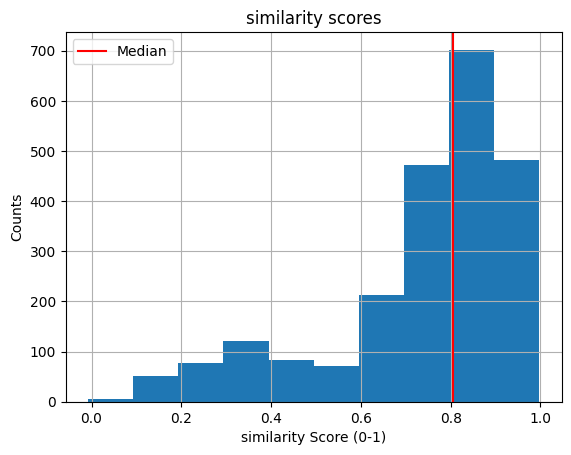

In [ ]:
fig, ax = plot_sim_scores(v2_test_inference)